<a href="https://colab.research.google.com/github/karlaguimaraesp/Interview-Test-/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


In [ ]:
#*Carregando Dataset*

In [ ]:
Dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Exams/df.csv", sep=',')
Dataset

,Data,Soybeans (CBT $/bu),Corn (CBT $/bu),U.S. Dollar Index (DXY),Crude Oil WTI (NYM $/bbl),USD/BRL rate
0,12-Jul-94,609.22,230.99,89.10,19.64,0.93
1,11-ago-94,582.65,219.24,89.11,18.37,0.90
2,12-set-94,566.41,219.51,87.98,17.47,0.87
3,12-out-94,540.73,216.01,86.55,17.72,0.85
4,9-Nov-94,559.20,215.55,87.71,18.10,0.84
...,...,...,...,...,...,...
239,11-Jun-14,1436.99,446.67,80.44,105.15,2.24
240,11-Jul-14,1266.24,384.76,80.54,102.46,2.22
241,12-ago-14,1178.39,359.35,81.85,96.08,2.27
242,11-set-14,1007.74,336.47,84.37,93.17,2.33


In [ ]:
#Verificando se há dados faltante 

In [ ]:
Dataset.isnull().sum()

Data                         0
Soybeans (CBT $/bu)          0
Corn (CBT $/bu)              1
U.S. Dollar Index (DXY)      0
Crude Oil WTI (NYM $/bbl)    0
USD/BRL rate                 1
dtype: int64

In [ ]:
#Dados estatísticos

In [ ]:
Dataset.describe()

,Soybeans (CBT $/bu),Corn (CBT $/bu),U.S. Dollar Index (DXY),Crude Oil WTI (NYM $/bbl),USD/BRL rate
count,244.000000,243.000000,244.000000,244.000000,243.000000
mean,835.813893,348.047490,89.937664,52.308484,1.937037
std,342.160758,162.378049,11.689160,32.345297,0.649553
min,430.780000,178.290000,72.100000,11.290000,0.840000
25%,566.370000,219.530000,81.057500,22.555000,1.610000
50%,712.925000,280.290000,86.470000,41.225000,1.930000
75%,1068.017500,412.540000,97.562500,82.080000,2.310000
max,1695.290000,803.540000,118.980000,134.020000,3.810000


In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data                       244 non-null    object 
 1   Soybeans (CBT $/bu)        244 non-null    float64
 2   Corn (CBT $/bu)            244 non-null    float64
 3   U.S. Dollar Index (DXY)    244 non-null    float64
 4   Crude Oil WTI (NYM $/bbl)  244 non-null    float64
 5   USD/BRL rate               244 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.6+ KB


In [ ]:
#Substituindo dados faltantes pela média

In [ ]:
Dataset['Corn (CBT $/bu)'].fillna(348.047490, inplace=True)
Dataset['Corn (CBT $/bu)'].describe()

count    244.000000
mean     348.047490
std      162.043593
min      178.290000
25%      219.540000
50%      280.815000
75%      412.495000
max      803.540000
Name: Corn (CBT $/bu), dtype: float64

In [ ]:
Dataset['USD/BRL rate'].fillna(1.937037, inplace=True)
Dataset['USD/BRL rate'].describe()

count    244.000000
mean       1.937037
std        0.648215
min        0.840000
25%        1.610000
50%        1.930000
75%        2.310000
max        3.810000
Name: USD/BRL rate, dtype: float64

In [ ]:
#Verificando base de dados

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data                       244 non-null    object 
 1   Soybeans (CBT $/bu)        244 non-null    float64
 2   Corn (CBT $/bu)            244 non-null    float64
 3   U.S. Dollar Index (DXY)    244 non-null    float64
 4   Crude Oil WTI (NYM $/bbl)  244 non-null    float64
 5   USD/BRL rate               244 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.6+ KB


In [ ]:
#Plotando Séries Temporais

In [ ]:
#Soybeans:

In [ ]:
import plotly.express as px

df = px.data.stocks()
fig = px.line(Dataset, x='Data', y="Soybeans (CBT $/bu)")
fig.show()

In [ ]:
#rolmean = Dataset.rolling(window=20).mean()
#rolmean

In [ ]:
#Corn

In [ ]:
indexdDataset_logCorn = np.log(Dataset['Corn (CBT $/bu)'])
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y=indexdDataset_logCorn)
fig.show()

In [ ]:
#Transformação Logarítima

In [ ]:
#Soybeans

In [ ]:
indexdDataset_logSoybeans = np.log(Dataset['Soybeans (CBT $/bu)'])
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y=indexdDataset_logSoybeans )
fig.show()

In [ ]:
#USD/BRL rate

In [ ]:
indexdDataset_logUSD_BRL = np.log(Dataset['USD/BRL rate'])
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y=indexdDataset_logUSD_BRL)
fig.show()

In [ ]:
#Corn

In [ ]:
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y="Corn (CBT $/bu)")
fig.show()

In [ ]:
#U.S. Dollar Index (DXY)"

In [ ]:
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y="U.S. Dollar Index (DXY)")
fig.show()

In [ ]:
indexdDataset_logDollar = np.log(Dataset['U.S. Dollar Index (DXY)'])
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y=indexdDataset_logDollar)
fig.show()

In [ ]:
#Transformação LOG - 

In [ ]:
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y="Crude Oil WTI (NYM $/bbl)")
fig.show()

In [ ]:
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y="USD/BRL rate")
fig.show()

In [ ]:
indexdDataset_logCrudeOil = np.log(Dataset['Crude Oil WTI (NYM $/bbl)'])
df = px.data.stocks()
fig = px.line(Dataset, x='Data', y=indexdDataset_logCrudeOil)
fig.show()

In [ ]:
Auto Correlação

In [ ]:
DatasetLog = indexdDataset_logSoybeans, indexdDataset_logCorn, indexdDataset_logDollar, indexdDataset_logCrudeOil, indexdDataset_logUSD_BRL

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(indexdDataset_logUSD_BRL)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -1.9650895820683667
ADF p-values: 0.30208667306820824
ADF number of lags used: 2
ADF number of observations: 241
ADF critical values: {'1%': -3.4577787098622674, '5%': -2.873608704758507, '10%': -2.573201765981991}
ADF best information criterion: -841.7945908139318


In [ ]:
#Teste Dickey-Fuller
#
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(indexdDataset_logSoybeans)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)
#https://neptune.ai/blog/select-model-for-time-series-prediction-task

ADF test statistic: -1.7985578239480398
ADF p-values: 0.3811779287030976
ADF number of lags used: 1
ADF number of observations: 242
ADF critical values: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}
ADF best information criterion: -644.9169524279116


In [ ]:
#Média móvel 

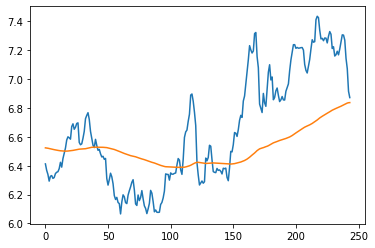

In [ ]:
#
from statsmodels.tsa.api import SimpleExpSmoothing
es = SimpleExpSmoothing(indexdDataset_logSoybeans)
es.fit(smoothing_level=0.01)
plt.plot(indexdDataset_logSoybeans)
plt.plot(es.predict(es.params, start=0, end=None))
plt.show()

In [ ]:
#Adicionando os valores de Log ao Dataset:

In [ ]:
Dataset["SoybeansLog"] = indexdDataset_logSoybeans
Dataset["CornLog"] = indexdDataset_logCorn
Dataset["DollarLog"] = indexdDataset_logDollar
Dataset["CrudeOilLog"] = indexdDataset_logCrudeOil
Dataset["USD_BRLog"] = indexdDataset_logUSD_BRL
Dataset.head()

,Data,Soybeans (CBT $/bu),Corn (CBT $/bu),U.S. Dollar Index (DXY),Crude Oil WTI (NYM $/bbl),USD/BRL rate,SoybeansLog,CornLog,DollarLog,CrudeOilLog,USD_BRLog
0,12-Jul-94,609.22,230.99,89.10,19.64,0.93,6.412179,5.442374,4.489759,2.977568,-0.072571
1,11-ago-94,582.65,219.24,89.11,18.37,0.90,6.367587,5.390167,4.489872,2.910719,-0.105361
2,12-set-94,566.41,219.51,87.98,17.47,0.87,6.339318,5.391398,4.477110,2.860485,-0.139262
3,12-out-94,540.73,216.01,86.55,17.72,0.85,6.292920,5.375325,4.460722,2.874694,-0.162519
4,9-Nov-94,559.20,215.55,87.71,18.10,0.84,6.326507,5.373193,4.474036,2.895912,-0.174353


In [ ]:
#Regressão Linear

Intercept: 
 5.343114077161799
Coefficients: 
 [ 0.65907    -0.61874984  0.07112919  0.03891239]
                            OLS Regression Results                            
Dep. Variable:            SoybeansLog   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     531.4
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.22e-117
Time:                        00:38:32   Log-Likelihood:                 163.41
No. Observations:                 244   AIC:                            -316.8
Df Residuals:                     239   BIC:                            -299.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



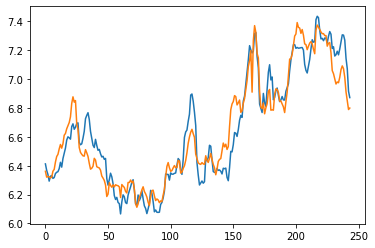

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

X = Dataset[["CornLog", "DollarLog", "CrudeOilLog", "USD_BRLog"]]
y = Dataset["SoybeansLog"]

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

plt.plot(X.index, y)
plt.plot(X.index, predictions)

In [ ]:
pred = 5.3431 + 

In [ ]:
#Random Forest

AttributeError: ignored

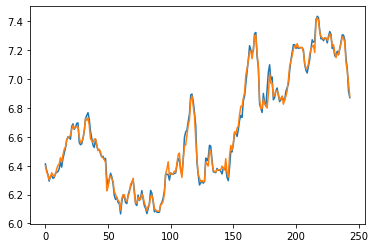

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#fit modelo
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

#predição
predict_rf = model_rf.predict(X)

#plot
plt.plot(X.index, y)
plt.plot(X.index, predict_rf)


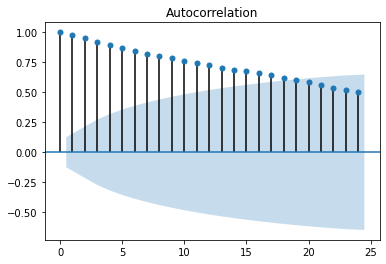

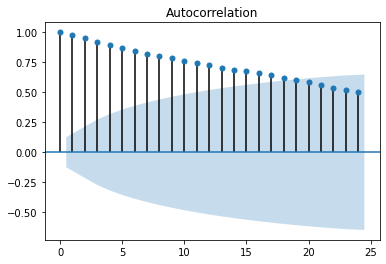

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Dataset['CornLog'])

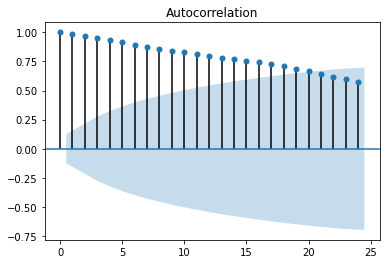

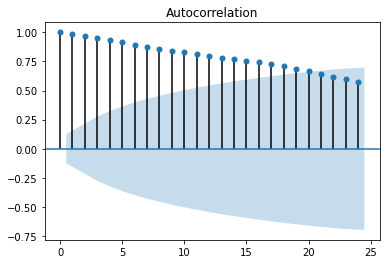

In [ ]:
plot_acf(Dataset["DollarLog"])

In [ ]:
from sklearn.linear_model import LinearRegression
 
# fit the model
my_lr = LinearRegression().fit(X, y)
my_lr
 
# predict on the same period
preds = my_lr.predict(X)
 
# plot what has been learned
plt.plot(X.index, y)
plt.plot(X.index, preds)

ValueError: ignored

In [ ]:
#https://blogs.sap.com/2021/05/06/a-multivariate-time-series-modeling-and-forecasting-guide-with-python-machine-learning-client-for-sap-hana/
#time series with multiple variables python
#https://www.mariofilho.com/como-criar-um-modelo-simples-para-prever-series-temporais-usando-machine-learning-em-python/
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
#https://datatofish.com/multiple-linear-regression-python/
